# dijkstra algorithm
the code from rosettacode is wrong :/

In [1]:
edge_list = [("a", "b", 7),  ("a", "c", 9),  ("a", "f", 14), ("b", "c", 10),
               ("b", "d", 15), ("c", "d", 11), ("c", "f", 2),  ("d", "e", 6),
               ("e", "f", 9)]

In [2]:
# http://rosettacode.org/wiki/Dijkstra%27s_algorithm#Python
from collections import namedtuple, deque
from pprint import pprint as pp
 
 
inf = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')
 
class Graph():
    def __init__(self, edges):
        edges2 = [Edge(*edge) for edge in edges]
        self.edges = edges2
        self.vertices = set(sum(([e.start, e.end] for e in edges2), []))
 
    def dijkstra(self, source, dest):
        assert source in self.vertices
        dist = {vertex: inf for vertex in self.vertices}
        previous = {vertex: None for vertex in self.vertices}
        dist[source] = 0
        q = self.vertices.copy()
        neighbours = {vertex: set() for vertex in self.vertices}
        for start, end, cost in self.edges:
            neighbours[start].add((end, cost))
#         pp(neighbours)
 
        while q:
            u = min(q, key=lambda vertex: dist[vertex])
            q.remove(u)
            if dist[u] == inf or u == dest:
                break
            for v, cost in neighbours[u]:
                alt = dist[u] + cost
                if alt < dist[v]:                                  # Relax (u,v,a)
                    dist[v] = alt
                    previous[v] = u
#         pp(previous)
        
        s, u = deque(), dest
        while previous[u]:
            s.appendleft(u)
            u = previous[u]
        s.appendleft(u)
        
        print(s)
        return s,dist,previous

In [3]:
start_node = "a"
end_node = "e"

In [4]:
graph = Graph(edge_list)
s,dist,previous = graph.dijkstra(start_node, end_node)
pp(s)
pp(dist)
pp(previous) ## the path is wrong

deque(['a', 'c', 'd', 'e'])
deque(['a', 'c', 'd', 'e'])
{'a': 0, 'b': 7, 'c': 9, 'd': 20, 'e': 26, 'f': 11}
{'a': None, 'b': 'a', 'c': 'a', 'd': 'c', 'e': 'd', 'f': 'c'}


In [5]:
import networkx as nx
g = nx.Graph()

g.add_weighted_edges_from(edge_list)

pos=nx.spring_layout(g,weight=None)
labels = nx.get_edge_attributes(g,'weight')

nx.draw_networkx(g,pos,node_color='yellow')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
print()

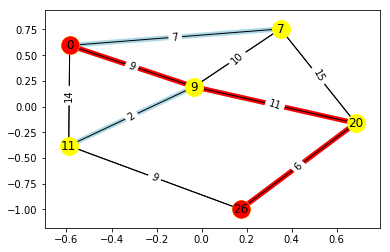

In [6]:
import networkx as nx
g = nx.Graph()


g.add_weighted_edges_from(edge_list)

# pos = nx.spring_layout(g,weight=None)  # uncomment to re-position randomly
labels = nx.get_edge_attributes(g,'weight')

nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
nx.draw_networkx(g,
                 pos,
                 with_labels=True,
                 labels=dist,
                 node_color='yellow')

nx.draw_networkx(g,
                 pos,
                 edgelist=list({key:val for key, val in previous.items() if val != None}.items()),
                 with_labels=False,
                 width = 5.0,
                 edge_color='lightblue',
                 node_color='yellow')

nx.draw_networkx(g,
                 pos,
                 edgelist=[(s[i],s[i+1]) for i in range(len(s)-1)],
                 with_labels=False,
                 width = 5.0,
                 edge_color='red',
                 node_color='yellow')

nx.draw_networkx(g,
                 pos,
                 node_color='red',
                 with_labels=False,
                 nodelist=(start_node,end_node))

print()

# positional arguments and keyword arguments

In [7]:
# https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

In [8]:
def save_ranking(*args, **kwargs):
    print(args)     
    print(kwargs)

In [9]:
save_ranking('ming', 'alice', 'tom', fourth='wilson', fifth='roy')     
# ('ming', 'alice', 'tom')
# {'fourth': 'wilson', 'fifth': 'roy'}

('ming', 'alice', 'tom')
{'fourth': 'wilson', 'fifth': 'roy'}


# unpacking with asterisk

In [10]:
numbers = [1, 2, 3, 4, 5, 6]

In [11]:
# The left side of unpacking should be list or tuple.
*a, = numbers
print(a)

[1, 2, 3, 4, 5, 6]


In [12]:
*a, b = numbers
print(a)
print(b) 

[1, 2, 3, 4, 5]
6


In [13]:
a, *b, = numbers
print(a)
print(b)

1
[2, 3, 4, 5, 6]


In [14]:
a, *b, c = numbers
print(a)
print(b)
print(c)

1
[2, 3, 4, 5]
6


# `reduce` function

Apply function of two arguments cumulatively to the items of iterable, from left to right, so as to reduce the iterable to a single value. For example, `reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])` calculates `((((1+2)+3)+4)+5)`. 

In [15]:
from functools import reduce

primes = [2, 3, 5, 7, 11, 13]

def product(*numbers):
    p = reduce(lambda x, y: x * y, numbers)
    return p 

print(product(*primes))
# 30030

print(product(primes))
# [2, 3, 5, 7, 11, 13]

30030
[2, 3, 5, 7, 11, 13]


# coin change problem, revisited
with `lru_cache` - to be continued

In [16]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

print([fib(n) for n in range(16)])
# [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

print(fib.cache_info())
# CacheInfo(hits=28, misses=16, maxsize=None, currsize=16)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
CacheInfo(hits=28, misses=16, maxsize=None, currsize=16)


# Python threading
Other than getting network resources I am not sure why would we need to thread in Python.

In [17]:
import requests
from bs4 import BeautifulSoup
import unicodedata
import numpy as np
import time
# import pandas as pd

def get_articles_from_page(page_num, debug = False):
    '''
    given page_num
    returns category_name_texts, 
            category_name_links, 
            article_title_links,
            article_title_texts
    '''
    
    category_name_texts = []
    category_name_links = []
    article_title_texts = []
    article_title_links = []
    
    try:
        page = requests.get('http://statestimesreview.com/page/{}/'.format(page_num))
        soup = BeautifulSoup(page.text, 'html.parser')

        soup = soup.find(class_="masonry penci-masonry")
        # narrow down to this section

        grid_items = soup.find_all(class_="item item-masonry grid-masonry")
        for grid_item in grid_items:

            try:
                category_item = grid_item.find(class_="penci-cat-name")
                category_name_text = category_item.text
                category_name_text = category_name_text.strip()
                category_name_link = category_item.get('href')

                article_title_item = grid_item.find(class_="grid-title")
                article_title_text = article_title_item.text
                article_title_link = article_title_item.find('a').get('href')

                category_name_texts.append(category_name_text)
                category_name_links.append(category_name_link)
                article_title_texts.append(article_title_text)
                article_title_links.append(article_title_link)

            except:
                print(page_num, "error")
                
        print(str(page_num) + " ", end="")

    except:
        print(page_num, "ERROR")
    
    return (category_name_texts, 
            category_name_links, 
            article_title_texts,
            article_title_links)

In [19]:
# import urllib.request as urllib2
from multiprocessing.dummy import Pool as ThreadPool 
import time

start_time = time.time()

# make the Pool of workers
pool = ThreadPool(20) 

# open the urls in their own threads
# and return the results
results = pool.map(get_articles_from_page, range(1,51))  # CHANGE THIS

# close the pool and wait for the work to finish 
pool.close()
pool.join()

print(time.time() - start_time)

print(results[:2])

12 16 6 18 4 14 9 7 5 17 20 3 13 10 2 11 8 19 15 1 22 27 21 28 23 30 26 34 37 29 25 24 31 32 38 35 39 36 33 40 43 41 45 48 47 49 50 42 46 44 16.93876600265503
[(['Conscription', 'Propaganda fake news', 'Editorial Opinions', 'Censorship', 'Corruption', 'Transport', 'Employment', 'Immigration', 'Cost of Living', 'HDB'], ['http://statestimesreview.com/category/conscription/', 'http://statestimesreview.com/category/propaganda-fake-news/', 'http://statestimesreview.com/category/editorial-opinions/', 'http://statestimesreview.com/category/censorship/', 'http://statestimesreview.com/category/corruption/', 'http://statestimesreview.com/category/transport/', 'http://statestimesreview.com/category/employment/', 'http://statestimesreview.com/category/immigration/', 'http://statestimesreview.com/category/cost-of-living/', 'http://statestimesreview.com/category/hdb/'], ['Minister Ng Eng Hen: 4% become mentally ill due to National Service', 'Ministry of Communications: Millionaire ministerial salari

# Python async and callback
To think of a use case